In [1]:
# In this example, we used the TensorFlow library to load the MNIST data,
# define an MLP model with three dense layers, compile the model, train it
# for 10 epochs, evaluate it on the test set, and make predictions on
# the test set. Finally, we plot some examples of the predictions made
# by the model.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-04-11 09:45:51.923186: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 09:45:51.954941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [4]:
# Flatten the 2D images into 1D arrays
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [5]:
# Convert the labels into one-hot encoded arrays
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# Define the model
# The number of parameters depends on the shapes and sizes of the layers.
# In the given model, the first layer Dense(512, activation='relu',
# input_shape=(784,)) has 784 input nodes and 512 output nodes. Therefore,
# the number of parameters in this layer would be (784 * 512) + 512 = 401920,
# where the +512 term is for the bias terms.
# The second layer also has 512 input nodes and 512 output nodes, which makes
# 512512 = 262,144 parameters. The third and last layer has 512 input nodes
# and 10 output nodes, which makes 512*10 = 5,120 parameters.
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
#model.add(tf.keras.layers.Dense(512, activation='relu'))
#model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
# over come overfitting by regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001),input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model and record the history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5028 - accuracy: 0.9292 - val_loss: 0.3317 - val_accuracy: 0.9535
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2754 - accuracy: 0.9616 - val_loss: 0.2484 - val_accuracy: 0.9625
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2264 - accuracy: 0.9674 - val_loss: 0.2258 - val_accuracy: 0.9656
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2042 - accuracy: 0.9708 - val_loss: 0.1931 - val_accuracy: 0.9729
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1911 - accuracy: 0.9720 - val_loss: 0.1837 - val_accuracy: 0.9736
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1788 - accuracy: 0.9745 - val_loss: 0.1789 - val_accuracy: 0.9725
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1690 - accuracy: 0.9749 - val_loss: 0.1709 - val_accuracy: 0.9722
Epoch 

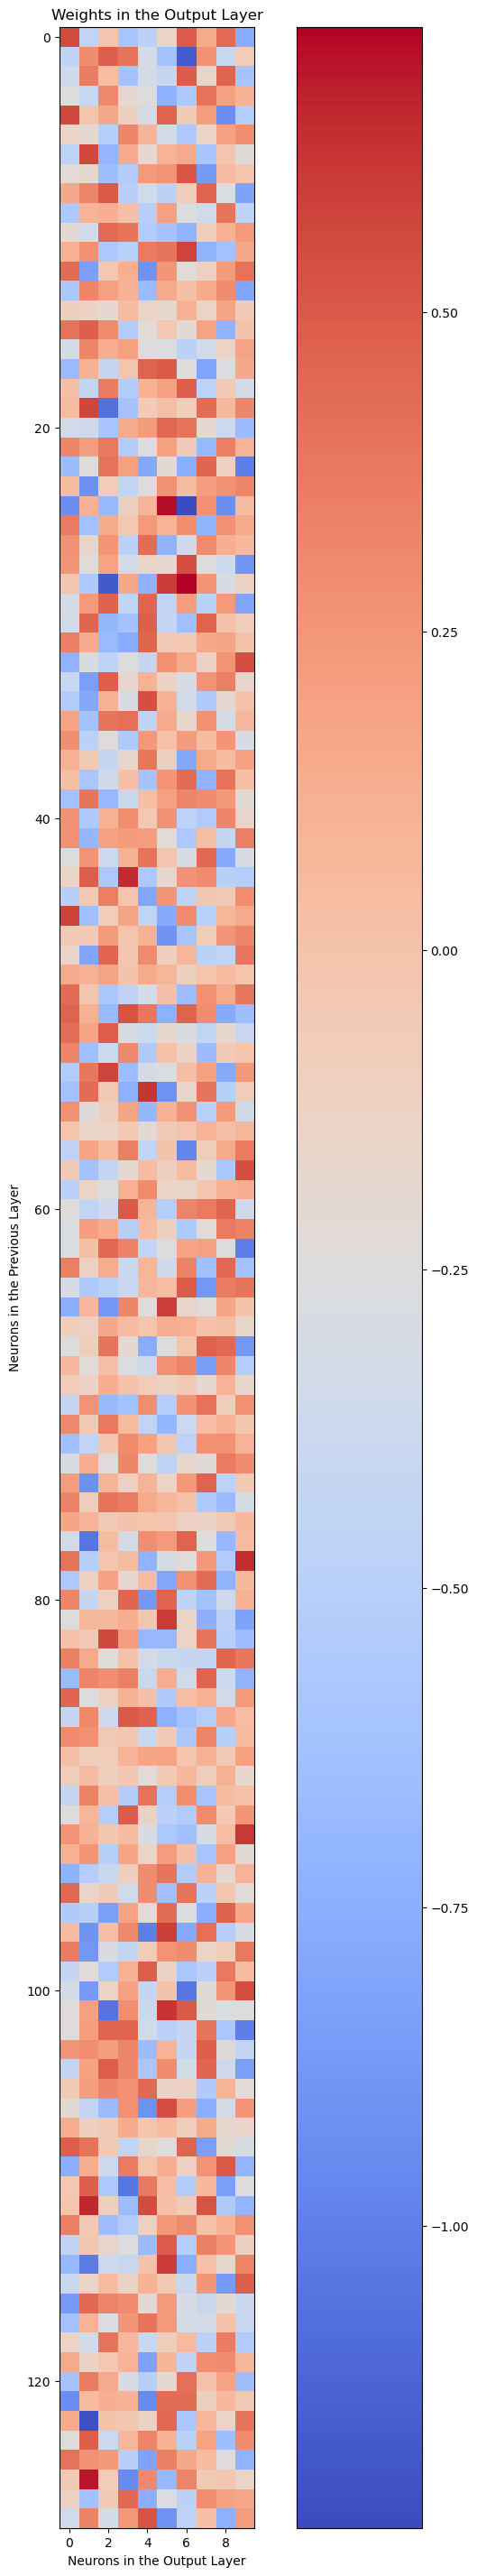

In [10]:
# Get the weights of the Dense layer
# plot the weights as a heatmap or image, where the weights are represented
# as pixel values.
# model.layers[2].get_weights()[0] returns only the weights of the third
# layer. If you wanted to get the biases, you would use
# model.layers[2].get_weights()[1].
dense_weights = model.layers[2].get_weights()[0]

# Plot the weights as a heatmap
fig, ax = plt.subplots(figsize=(12, 36))
im = ax.imshow(dense_weights, cmap='coolwarm')
plt.colorbar(im, ax=ax)
ax.set_title('Weights in the Output Layer')
ax.set_xlabel('Neurons in the Output Layer')
ax.set_ylabel('Neurons in the Previous Layer')
plt.show()

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 955us/step - loss: 0.1853 - accuracy: 0.9662
Test accuracy: 0.9661999940872192


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


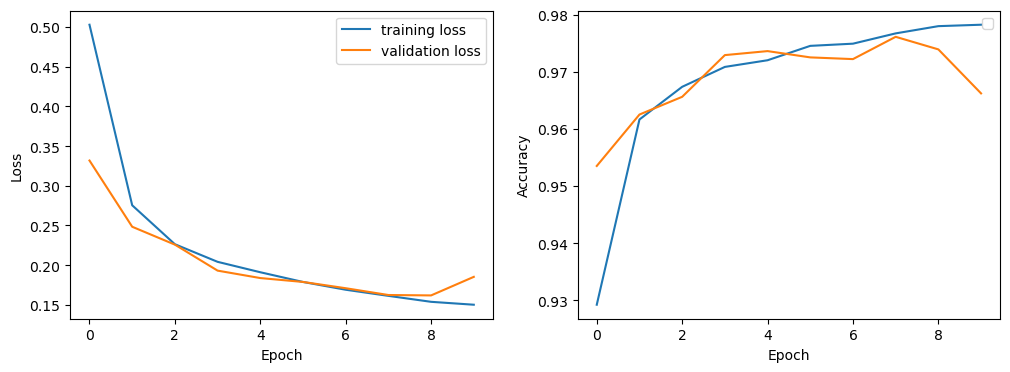

In [12]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot the loss and accuracy for training and validation data
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



313/313 [==============================] - 0s 879us/step


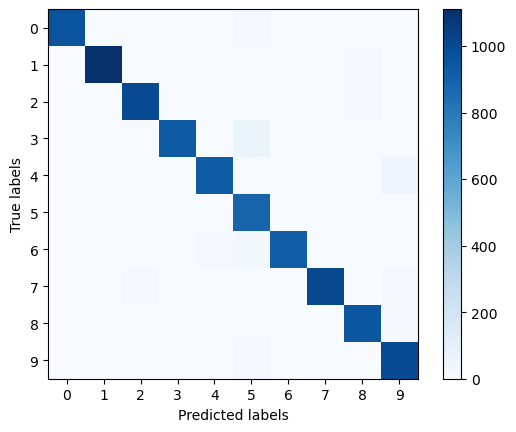

In [13]:
# Plot a confusion matrix of the test set predictions
test_preds = np.argmax(model.predict(x_test), axis=1)
conf_mat = tf.math.confusion_matrix(y_test.argmax(axis=1), test_preds)
plt.imshow(conf_mat, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
plt.show()

In [14]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 890us/step


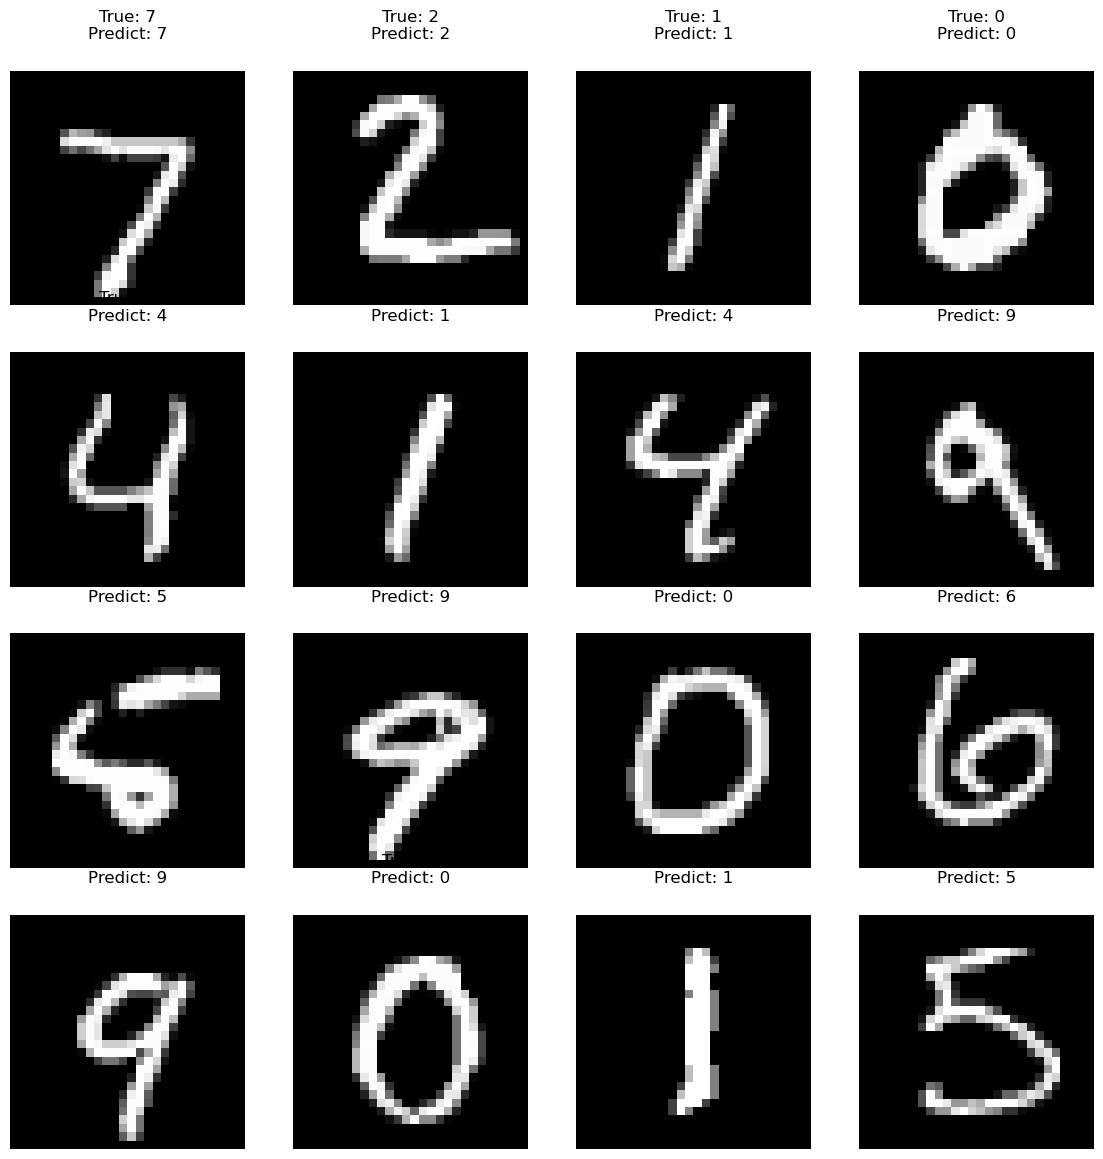

In [15]:
# Plot some examples from the test set and their predictions
fig, axes = plt.subplots(4, 4, figsize=(14, 14))
for i, ax in enumerate(axes.ravel()):
    ax.matshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("True: %d\nPredict: %d" % (np.argmax(y_test[i]), y_pred[i]))
    ax.axis("off")

plt.show()